# CARRADA Dataset: Camera and Automotive Radar with Range-Angle-Doppler Annotations

This notebook shows samples of annotated radar data and how to use utils functions

In [1]:
%matplotlib inline
import os
import json
import numpy as np
from skimage import io

from utils import CARRADA_HOME
from utils.configurable import Configurable
from utils.visualize_signal import SignalVisualizer
from utils.transform_annotations import AnnotationTransformer
from utils.generate_annotations import AnnotationGenerator
from utils.transform_data import DataTransformer

In [2]:
# Set path
%run ./scripts/set_path.py '/datasets_local/'

In [3]:
# Sample to visualize
seq_name = '2019-09-16-13-20-20'
instances = ['000670', '000673']
frame_name = '000100'

In [4]:
# Define paths
config_path = os.path.join(CARRADA_HOME, 'config.ini')
config = Configurable(config_path).config
warehouse = config['data']['warehouse']
carrada = os.path.join(warehouse, 'Carrada')
seq_path = os.path.join(carrada, seq_name)
rad_path = os.path.join(seq_path, 'unlagged_RAD_numpy', frame_name + '.npy')
img_path = os.path.join(seq_path, 'camera_images', frame_name + '.jpg')

# TODO: Use the new annotations_frame_oriented.json
annotations_path = os.path.join(carrada, 'past_params', 'annotations_frame_oriented.json')

In [5]:
# Load data

# Annotations
with open(annotations_path, 'r') as fp:
    annotations = json.load(fp)
annotations = annotations[seq_name][frame_name]  # Keep annotations of interest

# Range-angle and range-Doppler matrices
rad_matrix = np.load(rad_path)
data_transformer = DataTransformer(rad_matrix)
ra_matrix = data_transformer.to_ra()
rd_matrix = data_transformer.to_rd()

Camera image of the scene 2019-09-16-13-20-20, frame 000100


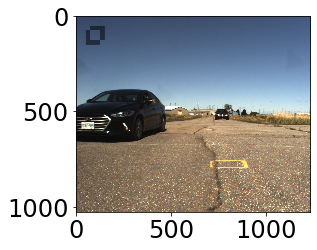

In [6]:
# Camera image of the scene
print('Camera image of the scene {}, frame {}'.format(seq_name, frame_name))
img = io.imread(img_path) 
io.imshow(img) 
io.show()

Raw Range-Doppler representation:


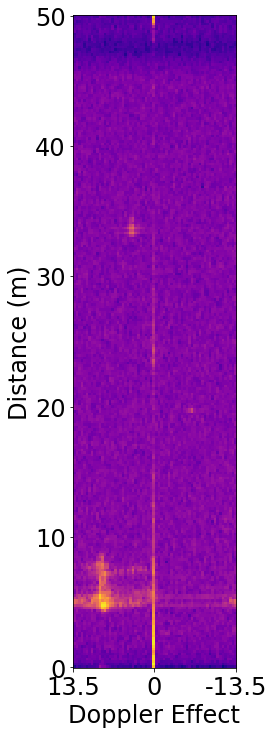

Range-Doppler with box annotations:


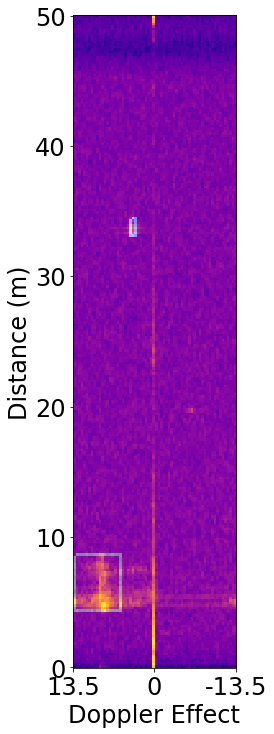

In [7]:
# Range-Doppler visualization
signal_visualizer = SignalVisualizer(rd_matrix)
print('Raw Range-Doppler representation:')
signal_visualizer.save_scale(path='.', signal_type='range_doppler', color_scale=False,
                             rotation=True, save_img=False, plot_img=True)
# for annotation_type in ['sparse', 'dense', 'box']:
for annotation_type in ['box']:
    for i, instance in enumerate(instances):
        points = annotations[instance]['range_doppler'][annotation_type]
        annot_generator = AnnotationGenerator(rd_matrix.shape, points)
        if annotation_type is 'sparse':
            annots = annot_generator.get_points()
        elif annotation_type is 'dense':
            annots = annot_generator.get_mask()
        else:
            annots = annot_generator.get_box()
        signal_visualizer.add_annotation(i, annots, annotation_type)
    print('Range-Doppler with {} annotations:'.format(annotation_type))
    signal_visualizer.save_multiple_annotations(path='/root/workspace/temp/rd_{}.png'.format(annotation_type),
                                                signal_type='range_doppler', color_scale=False,
                                                rotation=True, save_img=False, plot_img=True)
    signal_visualizer.reset_annotation()

Raw Range-Angle representation:


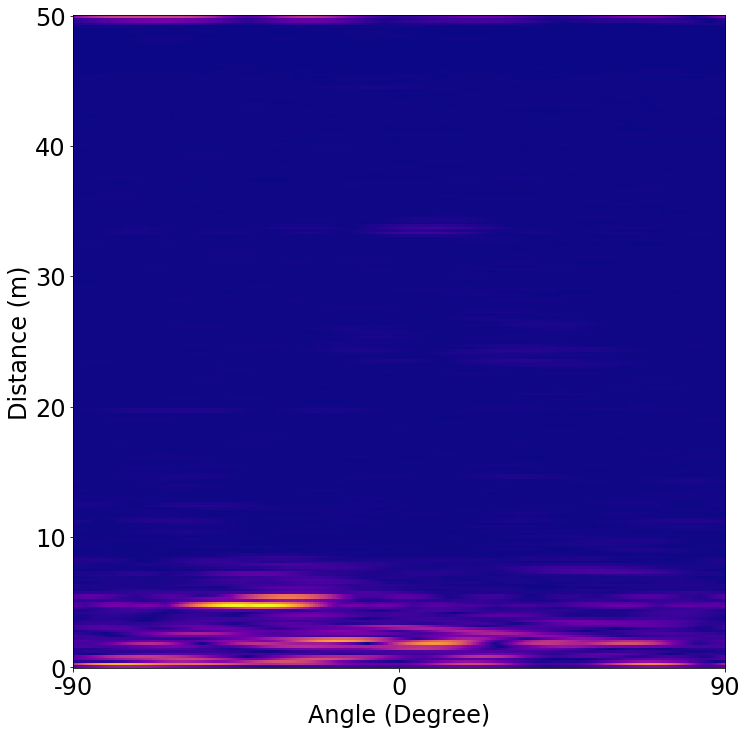

Range-Angle with box annotations:


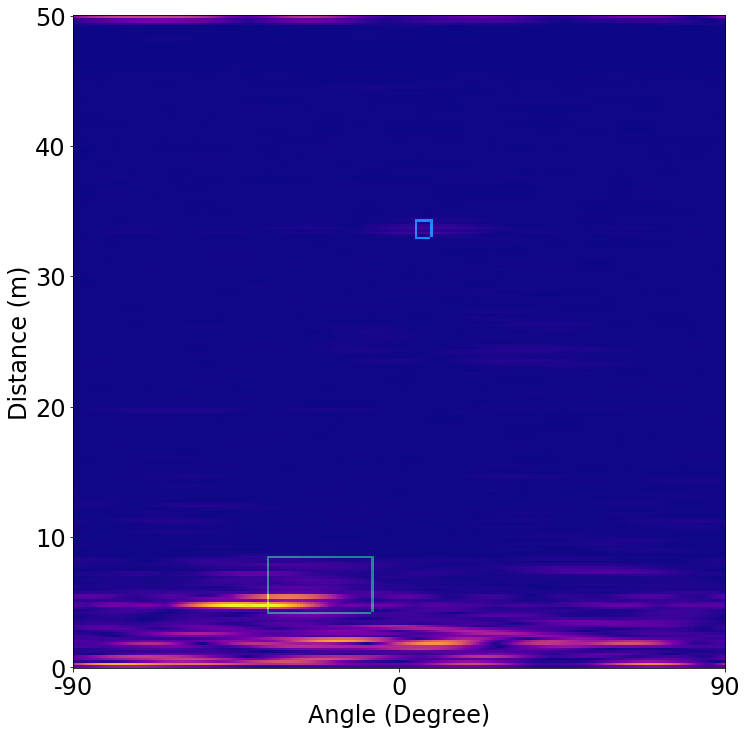

In [8]:
# Range-Angle visualization
signal_visualizer = SignalVisualizer(ra_matrix)
print('Raw Range-Angle representation:')
signal_visualizer.save_scale(path='.', signal_type='range_angle', color_scale=False,
                             rotation=False, save_img=False, plot_img=True)
# for annotation_type in ['sparse', 'dense', 'box']:
for annotation_type in ['box']:
    for i, instance in enumerate(instances):
        points = annotations[instance]['range_angle'][annotation_type]
        annot_generator = AnnotationGenerator(ra_matrix.shape, points)
        if annotation_type is 'sparse':
            annots = annot_generator.get_points()
        elif annotation_type is 'dense':
            annots = annot_generator.get_mask()
        else:
            annots = annot_generator.get_box()
        signal_visualizer.add_annotation(i, annots, annotation_type)
    print('Range-Angle with {} annotations:'.format(annotation_type))
    signal_visualizer.save_multiple_annotations(path='/root/workspace/temp/ra_{}.png'.format(annotation_type),
                                                signal_type='range_angle', color_scale=False,
                                                rotation=False, save_img=False, plot_img=True)
    signal_visualizer.reset_annotation()